In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                            # more plots
sns.set()
from scipy.optimize import minimize              
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   
from tqdm import tqdm_notebook
from pandas_datareader import data

In [13]:
URL="https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPALTT01USM661S&scale=left&cosd=1990-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-03-27&revision_date=2019-03-27&nd=1960-01-01"
cpi=pd.read_csv(URL)
cpi['DATE']=pd.DatetimeIndex(cpi['DATE'])
cpi.set_index('DATE', inplace=True)
cpi.rename(columns={'CPALTT01USM661S':'CPI'}, inplace=True)
cpi.head()

,CPI
DATE,
1990-01-01,53.793610
1990-02-01,54.004565
1990-03-01,54.257711
1990-04-01,54.384285
1990-05-01,54.468667


Text(0.5,1,'Monthly consumer price inflation,2015=100')

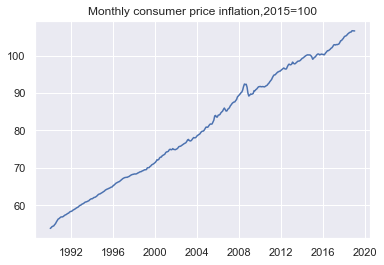

In [14]:
plt.plot(cpi)
plt.title('Monthly consumer price inflation,2015=100')

In [15]:
#Important metrics for forecast quality
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error

def mean_abs_per_error(true, pred):
    return np.mean(np.abs((true-pred)/true))*100

In [16]:
#Tommorow being average of k previous periods:Moving Average

def moving_average(data, k):
    return np.average(data[:-k])

moving_average(cpi, 12)

79.92996383123878

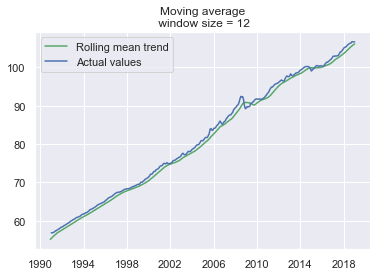

In [25]:
#using moving average to identify trends
def MA(data, period):
    """
       data - dataframe with timeseries
       period- rolling window size 
       plot_intervals - show confidence intervals
       
    """
    
    
    rolling_mean= data.rolling(window=period).mean()
    plt.title("Moving average\n window size = {}".format(period))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    plt.plot(data[period:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
   
        
MA(cpi,4)


,CPI
DATE,
2018-11-01,106.642140
2018-12-01,106.626529
2019-01-01,106.605433


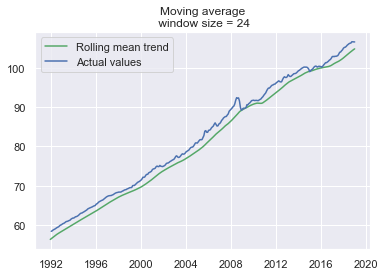

In [30]:
MA(cpi,24)

cpi.tail(3)


In [46]:
cpi.iloc[-2]

CPI    106.626529
Name: 2018-12-01 00:00:00, dtype: float64

In [34]:
# Using weighted average for smoothing
def weighted_average( data, weights):
    result=0
    for n in range(len(weights)):
        result+= data.iloc[-n-1]*weights[n]
    return result


In [35]:
weighted_average(cpi, [0.5, 0.3, 0.2])

CPI    106.619103
Name: 2019-01-01 00:00:00, dtype: float64

In [51]:
#exponential smoothing
def exp_smooth(data, alpha):
     
    result= [data.iloc[0]]
    for n in range(1, len(data)):
        result.append(alpha* data.iloc[n] + ((1-alpha)* result[n-1]))
    return result
    
    
    

In [52]:
exp_smooth(cpi, 1)

[CPI    53.79361
 Name: 1990-01-01 00:00:00, dtype: float64, CPI    54.004565
 dtype: float64, CPI    54.257711
 dtype: float64, CPI    54.384285
 dtype: float64, CPI    54.468667
 dtype: float64, CPI    54.806195
 dtype: float64, CPI    55.059342
 dtype: float64, CPI    55.523443
 dtype: float64, CPI    55.903163
 dtype: float64, CPI    56.282883
 dtype: float64, CPI    56.409456
 dtype: float64, CPI    56.620411
 dtype: float64, CPI    56.831367
 dtype: float64, CPI    56.873558
 dtype: float64, CPI    56.873558
 dtype: float64, CPI    57.000131
 dtype: float64, CPI    57.211086
 dtype: float64, CPI    57.37985
 dtype: float64, CPI    57.464233
 dtype: float64, CPI    57.632997
 dtype: float64, CPI    57.801761
 dtype: float64, CPI    57.886143
 dtype: float64, CPI    58.13929
 dtype: float64, CPI    58.308054
 dtype: float64, CPI    58.350245
 dtype: float64, CPI    58.476818
 dtype: float64, CPI    58.687773
 dtype: float64, CPI    58.814347
 dtype: float64, CPI    58.94092
 dtype:

In [55]:
def plotExponentialSmoothing(data, alphas):
   
        for alpha in alphas:
            plt.plot(exp_smooth(data, alpha), label="Alpha {}".format(alpha))
       
    plt.plot(data.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

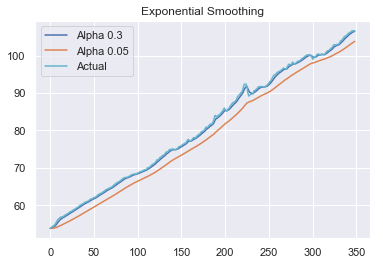

In [58]:
plotExponentialSmoothing(cpi,[0.3, 0.05])

In [ ]:
#Holt-Winters

